In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

In [8]:
data = pd.read_csv('/Users/raytrey5/Desktop/Programs/IST_652_training_data.csv')

In [9]:
pred_data = pd.read_csv('/Users/raytrey5/Desktop/Programs/IST_652_testing_data.csv')

In [10]:
data.head()

,Rank,Team,Year,Playoff Wins,Points/G,Total Yards,Passing Yards,Rushing Yards,Yards per Play,Yards per Pass Attempt,Pass/Rec TD,Rush TD,Def. Yards per Play,Def. Passing Yards,Def. Rushing Yards,Def. Score %,Def. Turnover %
0,1,Kansas City Chiefs,2019,3,5,6,5,23,2,5,5,14,14,8,26,11,24
1,2,Tennessee Titans,2019,3,10,12,21,3,4,1,8,3,13,24,12,6,17
2,3,San Fransisco 49ers,2019,2,2,4,13,2,5,2,10,1,2,1,17,3,27
3,4,Green Bay Packers,2019,1,15,18,17,15,18,17,15,9,22,14,23,12,26
4,5,Seattle Seahawks,2019,1,9,8,14,4,12,8,4,15,29,27,22,19,29


In [7]:
data.columns

Index(['Rank', 'Team', 'Year', 'Playoff Wins', 'Points/G', 'Total Yards',
       'Passing Yards', 'Rushing Yards', 'Yards per Play',
       'Yards per Pass Attempt', 'Pass/Rec TD', 'Rush TD',
       'Def. Yards per Play', 'Def. Passing Yards', 'Def. Rushing Yards',
       'Def. Score %', 'Def. Turnover %'],
      dtype='object')

In [31]:
del data['Rank']

In [48]:
#finding variables that have a Pearson's Correlation Coefficient of at least medium strength with number of playoff wins
corr = data.corr().abs()
corr = corr.loc[corr['Playoff Wins']>.25]
corr.index

Index(['Playoff Wins', 'Points/G', 'Total Yards', 'Passing Yards',
       'Yards per Play', 'Yards per Pass Attempt', 'Pass/Rec TD'],
      dtype='object')

Text(0.5, 15.0, 'Regular Season Stat Rankings')

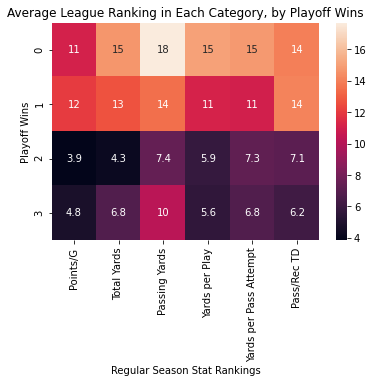

In [49]:
#Relationship between the varibales with playoff wins
variables = list(corr.index)
corr_df = data[variables].groupby('Playoff Wins').mean()
corr_df
plt.title("Average League Ranking in Each Category, by Playoff Wins")
sns.heatmap(data=corr_df,annot=True)
plt.xlabel("Regular Season Stat Rankings")

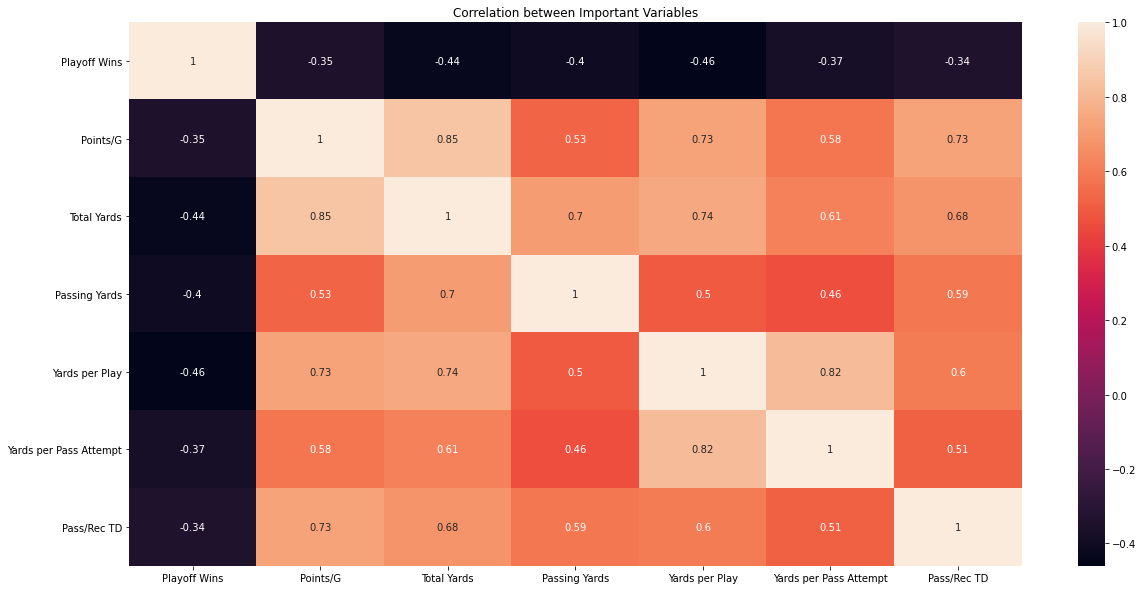

In [50]:
#Check for Multicollinearity between the important variables
plt.figure(figsize=(20,10))
plt.title("Correlation between Important Variables")
sns.heatmap(data=data[variables].corr(), annot=True)

[Text(0, 0.5, 'Regular Season League Ranking')]

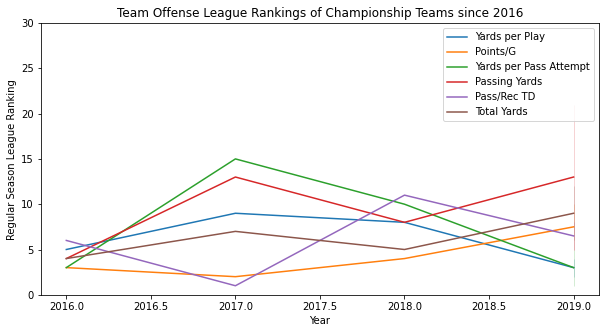

In [51]:
#offensive rankings
superbowl_years = data.loc[data['Playoff Wins']==3]
plt.figure(figsize=(10,5))
plt.title("Team Offense League Rankings of Championship Teams since 2016")
ax = sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Yards per Play'],label="Yards per Play")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Points/G'],label="Points/G")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Yards per Pass Attempt'],label="Yards per Pass Attempt")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Passing Yards'],label="Passing Yards")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Pass/Rec TD'],label="Pass/Rec TD")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Total Yards'],label="Total Yards")
plt.ylim(0, 30)
ax.set(ylabel="Regular Season League Ranking")


[Text(0, 0.5, 'Regular Season League Ranking')]

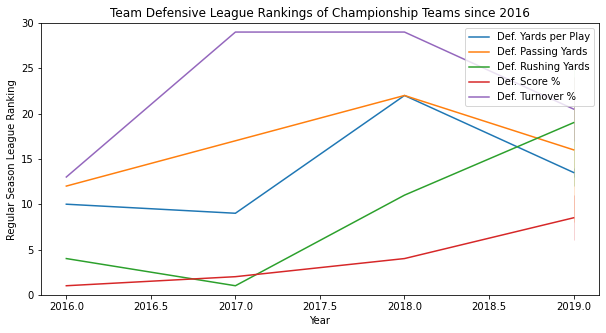

In [52]:
#defensive rankings
superbowl_years = data.loc[data['Playoff Wins']==3]
plt.figure(figsize=(10,5))
plt.title("Team Defensive League Rankings of Championship Teams since 2016")
ax = sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Def. Yards per Play'],label="Def. Yards per Play")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Def. Passing Yards'],label="Def. Passing Yards")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Def. Rushing Yards'],label="Def. Rushing Yards")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Def. Score %'],label="Def. Score %")
sns.lineplot(x=superbowl_years.Year, y=superbowl_years['Def. Turnover %'],label="Def. Turnover %")
plt.ylim(0, 30)
ax.set(ylabel="Regular Season League Ranking")

In [53]:
#Modeling

X = data[variables].drop('Playoff Wins',1)
y = data['Playoff Wins']

pred_X = pred_data[variables].drop('Playoff Wins',1)

X.head()

,Points/G,Total Yards,Passing Yards,Yards per Play,Yards per Pass Attempt,Pass/Rec TD
0,5,6,5,2,5,5
1,10,12,21,4,1,8
2,2,4,13,5,2,10
3,15,18,17,18,17,15
4,9,8,14,12,8,4


In [54]:
#splitting data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [55]:
#Linear Regression


lg_model = linear_model.LinearRegression()
lg_model.fit(X_train, y_train)
lg_model_predicted_wins = lg_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(lg_model_predicted_wins, y_valid)))

Mean Absolute Error: 0.7352918650206194


In [63]:
lg_model_predicted_wins = lg_model.predict(pred_X)
lg_model_predicted_wins

array([-0.90410859,  1.88569122,  0.4332389 ,  1.3394911 ,  0.98190629,
        1.43651402,  1.29526559,  0.75236062,  1.711852  , -0.40218969,
        0.82370217,  1.12440269,  1.35567178,  0.22452786, -0.35813023,
        0.91675295,  0.94976755,  1.79037303,  0.18887214, -0.18427637,
        0.87174362])

In [64]:
lg_model_predicted_wins_df = pred_data[['Team','Playoff Wins']]
i=0
while i<21:
    lg_model_predicted_wins_df.at[i, 'Playoff Wins'] = lg_model_predicted_wins[i]
    i+=1
lg_model_predicted_wins_df.sort_values(by='Playoff Wins',ascending=False)

,Team,Playoff Wins
1,Kansas City Chiefs,1.885691
17,Minnesota Vikings,1.790373
8,Los Angeles Rams,1.711852
5,Seattle Seahawks,1.436514
12,Arizona Cardinals,1.355672
3,Green Bay Packers,1.339491
6,Buffalo Bills,1.295266
11,Tampa Bay Buccaneers,1.124403
4,Tennessee Titans,0.981906
16,New England Patriots,0.949768


In [58]:
#Random Forest Modeling 
#using cross validation score to build first model
from sklearn.model_selection import cross_val_score

def rfr_cvs(n_estimators,cv):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    scores = -1*cross_val_score(model,X,y,cv=cv,scoring='neg_mean_absolute_error')
    return "score = "+str(scores.mean())+" with n_estimators: "+str(n_estimators)+" and cv: "+str(cv)

In [59]:
rfr_model = RandomForestRegressor(n_estimators=350, random_state=0)
rfr_model.fit(X_train, y_train)
rfr_predicted_wins = rfr_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(rfr_predicted_wins, y_valid)))

Mean Absolute Error: 0.685952380952381


In [60]:
rfr_predicted_wins = rfr_model.predict(pred_X)
rfr_predicted_wins

array([0.36      , 1.95142857, 0.75142857, 1.9       , 0.58285714,
       2.40285714, 1.06      , 0.66      , 1.21428571, 0.29142857,
       0.35428571, 1.04571429, 0.77428571, 0.63428571, 0.12      ,
       0.68285714, 0.67142857, 1.67142857, 0.51142857, 0.46857143,
       0.46285714])

In [61]:
rfr_predicted_wins_df = pred_data[['Team','Playoff Wins']]
i=0
while i<21:
    rfr_predicted_wins_df.at[i, 'Playoff Wins'] = rfr_predicted_wins[i]
    i+=1
rfr_predicted_wins_df.sort_values(by='Playoff Wins',ascending=False)

,Team,Playoff Wins
5,Seattle Seahawks,2.402857
1,Kansas City Chiefs,1.951429
3,Green Bay Packers,1.900000
17,Minnesota Vikings,1.671429
8,Los Angeles Rams,1.214286
6,Buffalo Bills,1.060000
11,Tampa Bay Buccaneers,1.045714
12,Arizona Cardinals,0.774286
2,New Orleans Saints,0.751429
15,Las Vegas Raiders,0.682857
